# Coding Challenge 2: Sales Analyst Restaurant

## Import

In [135]:
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Import, exploration, cleaning

In [2]:
df_deliverando = pd.read_csv('../data/SalesAnalyst_deliverando.csv', sep=';')

df_deliverando = df_deliverando[df_deliverando['zip'].isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]


In [3]:
df_deliverando.rename(columns={'Month 1':'month_1', 'Month 2':'month_2', 'delivery service':'delivery_service'},
                      inplace=True)

In [28]:
df_deliverando.drop_duplicates(inplace=True)
df_deliverando.head(7)

,name,zip,kpi,month_1,month_2,delivery_service,franchise,name_franchise
0,Mampf,8020,# Commissionable Orders,699.0,822.00,deliverando,0,Mampf 8020 No. 0
1,Mampf,8020,Avg Basket Size €,22.5,23.33,deliverando,0,Mampf 8020 No. 0
2,Mampf,8020,# Negative Comments,3.0,4.00,deliverando,0,Mampf 8020 No. 0
3,Mampf,8020,# Positive Comments,1.0,1.00,deliverando,0,Mampf 8020 No. 0
4,Mampf,8020,% Kill Rate,52.0,46.00,deliverando,0,Mampf 8020 No. 0
5,Mampf,8020,Avg Time to Accept (s),17.0,15.00,deliverando,0,Mampf 8020 No. 0
6,Dolce Vita,8020,# Commissionable Orders,1178.0,1353.00,deliverando,0,Dolce Vita 8020 No. 0


In [5]:
# replace dean & david Wels

df_deliverando.loc[df_deliverando['name'] == 'dean & david Wels', 'name'] = 'dean & david'

**Commissionable orders in Month 1 and 2**

In [14]:
orders_sum_m1 = df_deliverando[df_deliverando['kpi']=='# Commissionable Orders'].groupby('kpi')['month_1'].sum()
orders_sum_m1

kpi
# Commissionable Orders    53478.0
Name: month_1, dtype: float64

In [15]:
orders_sum_m2 = df_deliverando[df_deliverando['kpi']=='# Commissionable Orders'].groupby('kpi')['month_2'].sum()
orders_sum_m2

kpi
# Commissionable Orders    55617.0
Name: month_2, dtype: float64

In [16]:
(orders_sum_m2/orders_sum_m1-1)*100

kpi
# Commissionable Orders    3.999776
dtype: float64

**Negative comments**

In [32]:
neg_comm_m1 = df_deliverando[df_deliverando['kpi']=='# Negative Comments'].groupby('kpi')['month_1'].sum()
neg_comm_m2 = df_deliverando[df_deliverando['kpi']=='# Negative Comments'].groupby('kpi')['month_2'].sum()
neg_comm_ratio = (neg_comm_avg_m2/neg_comm_avg_m1-1)*100

In [33]:
print(neg_comm_m1, neg_comm_m2, neg_comm_ratio)

kpi
# Negative Comments    280.0
Name: month_1, dtype: float64 kpi
# Negative Comments    301.0
Name: month_2, dtype: float64 kpi
# Negative Comments    7.5
dtype: float64


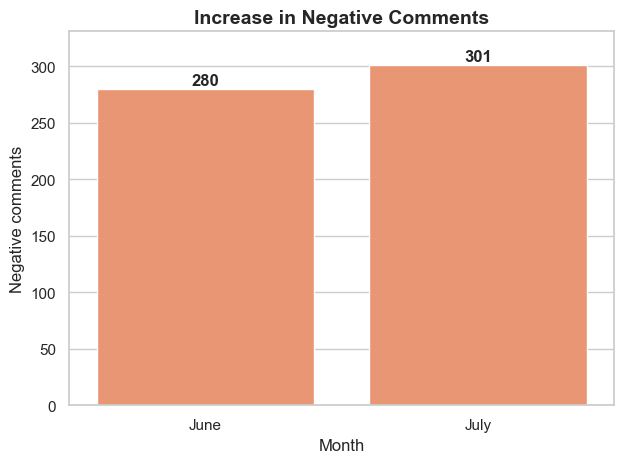

In [69]:
# new df for plot (1 row, 2 numbers)
neg_comm_m1 = round(float(neg_comm_m1))
neg_comm_m2 = round(float(neg_comm_m2))
df_neg_comm = [neg_comm_m1, neg_comm_m2]
labels = ['June', 'July']

# Setting Seaborn style (optional but improves aesthetics)
sns.set(style='whitegrid')

# Custom color palette
colors = ['#fc8d62', '#fc8d62']  # You can choose any colors you like

# Creating the bar plot with custom colors
sns.barplot(x=labels, y=df_neg_comm, palette=colors)

# Adding data labels on top of the bars
for index, value in enumerate(df_neg_comm):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Negative comments', fontsize=12)
plt.title('Increase in Negative Comments', fontsize=14, fontweight='bold')

# Adjusting the plot layout for better visibility of labels
plt.tight_layout()

# change y range
plt.ylim(0, max(df_neg_comm) + 30)

# save and display the plot
plt.savefig('neg_comm_plot.png', dpi=300)
plt.show()

**Kill rate**

In [40]:
kill_rate_avg_m1 = float(df_deliverando[df_deliverando['kpi']=='% Kill Rate'].groupby('kpi')['month_1'].mean())
kill_rate_avg_m2 = float(df_deliverando[df_deliverando['kpi']=='% Kill Rate'].groupby('kpi')['month_2'].mean())
kill_rate_avg_ratio = (kill_rate_avg_m2/kill_rate_avg_m1-1)*100
print(kill_rate_avg_m1, kill_rate_avg_m2, kill_rate_avg_ratio)

75.98753488372093 71.24990697674419 -6.234743519744967


C:\Users\radek\AppData\Local\Temp\ipykernel_2772\511469282.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  kill_rate_avg_m1 = float(df_deliverando[df_deliverando['kpi']=='% Kill Rate'].groupby('kpi')['month_1'].mean())
C:\Users\radek\AppData\Local\Temp\ipykernel_2772\511469282.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  kill_rate_avg_m2 = float(df_deliverando[df_deliverando['kpi']=='% Kill Rate'].groupby('kpi')['month_2'].mean())


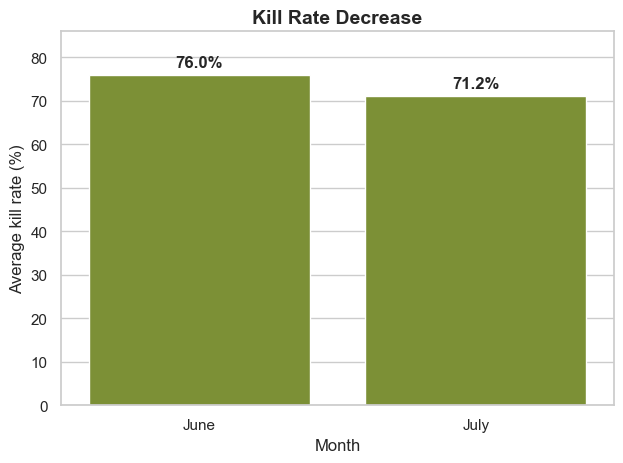

In [50]:
# new df for plot (1 row, 2 numbers)
kill_rate_avg_m1 = round(kill_rate_avg_m1, 1)
kill_rate_avg_m2 = round(kill_rate_avg_m2, 1)
df_plot_kill_rate = [kill_rate_avg_m1, kill_rate_avg_m2]
labels = ['June', 'July']

# Setting Seaborn style (optional but improves aesthetics)
sns.set(style='whitegrid')

# Custom color palette
colors = ['#849f27', '#849f27']  # You can choose any colors you like

# Creating the bar plot with custom colors
sns.barplot(x=labels, y=df_plot_kill_rate, palette=colors)

# Adding data labels on top of the bars
for index, value in enumerate(df_plot_kill_rate):
    plt.text(index, value + 1, f'{value}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average kill rate (%)', fontsize=12)
plt.title('Kill Rate Decrease', fontsize=14, fontweight='bold')

# Adjusting the plot layout for better visibility of labels
plt.tight_layout()

# change y range
plt.ylim(0, max(df_plot_kill_rate) + 10)

# save and display the plot
plt.savefig('kill_rate_plot.png', dpi=300)
plt.show()

**Avg time to accept**

In [36]:
acc_time_avg_m1 = df_deliverando[df_deliverando['kpi']=='Avg Time to Accept (s)'].groupby('kpi')['month_1'].mean()
acc_time_avg_m2 = df_deliverando[df_deliverando['kpi']=='Avg Time to Accept (s)'].groupby('kpi')['month_2'].mean()
acc_time_avg_ratio = (acc_time_avg_m2/acc_time_avg_m1-1)*100
print(acc_time_avg_m1, acc_time_avg_m2, acc_time_avg_ratio)

kpi
Avg Time to Accept (s)    282.682243
Name: month_1, dtype: float64 kpi
Avg Time to Accept (s)    277.383178
Name: month_2, dtype: float64 kpi
Avg Time to Accept (s)   -1.874566
dtype: float64


In [64]:
# total saved time

acc_time_sum_m1 = df_deliverando[df_deliverando['kpi']=='Avg Time to Accept (s)'].groupby('kpi')['month_1'].sum()
acc_time_sum_m2 = df_deliverando[df_deliverando['kpi']=='Avg Time to Accept (s)'].groupby('kpi')['month_2'].sum()
acc_time_avg_diff = acc_time_sum_m2 - acc_time_sum_m1
print(acc_time_sum_m1, acc_time_sum_m2, acc_time_avg_diff)

kpi
Avg Time to Accept (s)    60494.0
Name: month_1, dtype: float64 kpi
Avg Time to Accept (s)    59360.0
Name: month_2, dtype: float64 kpi
Avg Time to Accept (s)   -1134.0
dtype: float64


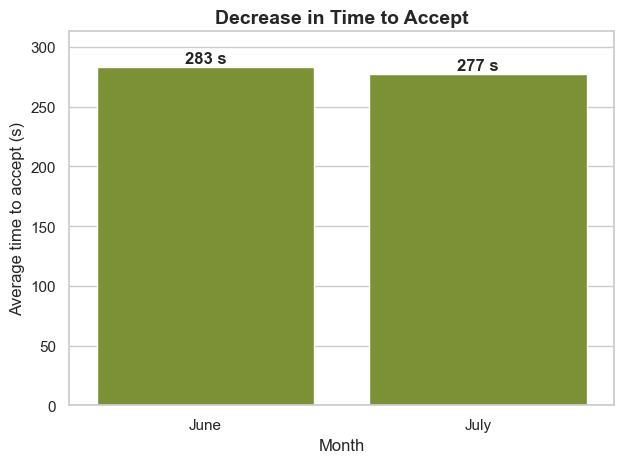

In [59]:
# new df for plot (1 row, 2 numbers)
acc_time_avg_m1 = round(float(acc_time_avg_m1))
acc_time_avg_m2 = round(float(acc_time_avg_m2))
df_plot_acc_time = [acc_time_avg_m1, acc_time_avg_m2]
labels = ['June', 'July']

# Setting Seaborn style (optional but improves aesthetics)
sns.set(style='whitegrid')

# Custom color palette
colors = ['#849f27', '#849f27']  # You can choose any colors you like

# Creating the bar plot with custom colors
sns.barplot(x=labels, y=df_plot_acc_time, palette=colors)

# Adding data labels on top of the bars
for index, value in enumerate(df_plot_acc_time):
    plt.text(index, value + 1, f'{value} s', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average time to accept (s)', fontsize=12)
plt.title('Decrease in Time to Accept', fontsize=14, fontweight='bold')

# Adjusting the plot layout for better visibility of labels
plt.tight_layout()

# change y range
plt.ylim(0, max(df_plot_acc_time) + 30)

# save and display the plot
plt.savefig('acc_time_plot.png', dpi=300)
plt.show()

**No. of positive comments is never larger than 1:**

In [144]:
df_deliverando[(df_deliverando['kpi']=='# Positive Comments') & ((df_deliverando['month_1']>1) | (df_deliverando['month_2']>1))]


,name,zip,kpi,month_1,month_2,delivery_service


**More statistics after cumcount**

In [7]:
df_stat = df_deliverando
df_stat['franchise'] = df_stat.groupby(['name','zip','kpi']).cumcount()

df_stat[['zip', 'franchise']] = df_stat[['zip', 'franchise']].astype(str)

df_stat['name_franchise'] = df_stat['name'] +' '+ df_stat['zip']\
+' No. '+ df_stat['franchise']

In [11]:
df_stat_wide = pd.pivot(df_stat,
                     columns='kpi', # column to pivot
                     index=['name_franchise'], # columns to be kept, must become multicolumn index
                     values=['month_1', 'month_2']) # column of values to pivot
df_stat_wide = df_stat_wide.reset_index() # get rid of multicolumn index
df_stat_wide.describe()

month_1                                          \
kpi   # Commissionable Orders # Negative Comments # Positive Comments   
count              335.000000          334.000000          329.000000   
mean               159.635821            0.838323            0.577508   
std                321.414462            1.964604            0.494708   
min                  0.000000            0.000000            0.000000   
25%                  0.000000            0.000000            0.000000   
50%                 36.000000            0.000000            1.000000   
75%                160.000000            1.000000            1.000000   
max               2508.000000           13.000000            1.000000   

                                                            \
kpi   % Kill Rate Avg Basket Size € Avg Time to Accept (s)   
count  215.000000        214.000000             214.000000   
mean    75.987535         20.644953             282.682243   
std     43.857855          5.173853             267.414735   
min      0.000000          9.230000               9.000000   
25%     48.000000         16.962500              19.000000   
50%     77.000000         20.705000             323.500000   
75%    102.500000         24.057500             462.000000   
max    227.000000         38.300000            1951.000000   

                      month_2                                          \
kpi   # Commissionable Orders # Negative Comments # Positive Comments   
count              335.000000          334.000000          329.000000   
mean               166.020896            0.901198            0.610942   
std                316.655108            1.907579            0.488279   
min                  0.000000            0.000000            0.000000   
25%                  0.000000            0.000000            0.000000   
50%                 40.000000            0.000000            1.000000   
75%                159.000000            1.000000            1.000000   
max               2180.000000           11.000000            1.000000   

                                                            
kpi   % Kill Rate Avg Basket Size € Avg Time to Accept (s)  
count  215.000000        214.000000             214.000000  
mean    71.249907         20.929112             277.383178  
std     42.018859          5.354354             242.810815  
min      0.000000          8.750000               9.000000  
25%     45.500000         17.297500              18.000000  
50%     71.000000         20.950000             312.500000  
75%     95.000000         24.292500             476.500000  
max    231.000000         43.100000            1051.000000

In [106]:
df_competition_month1 = pd.read_excel('../data/SalesAnalyst_Competition.xlsx', sheet_name = 'Month 1')
df_competition_month2 = pd.read_excel('../data/SalesAnalyst_Competition.xlsx', sheet_name = 'Month 2')

df_competition_month1 = df_competition_month1[df_competition_month1['zip'].isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]
df_competition_month2 = df_competition_month2[df_competition_month2['zip'].isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]


In [107]:
df_competition_month1.drop_duplicates(inplace=True)
df_competition_month2.drop_duplicates(inplace=True)

df_competition_month2.head(3)

,name,zip,orders,month,delivery_service
21,PHO YOU,8010,29,2,competition
57,Than Thai Asia,8010,12,2,competition
60,Heinz,8041,672,2,competition


In [108]:
# try stripping values in 'names'

df_deliverando['name'] = df_deliverando['name'].str.strip()
df_competition_month1['name'] = df_competition_month1['name'].str.strip()
df_competition_month2['name'] = df_competition_month2['name'].str.strip()

In [109]:
# the problem with duplicates is that they have different zip, need to drop this column first

df_deliverando = df_deliverando.drop(columns='zip')
df_competition_month1 = df_competition_month1.drop(columns='zip')
df_competition_month2 = df_competition_month2.drop(columns='zip')

In [110]:
#df_deliverando['name'].value_counts()['McDonald\'s®']

In [111]:
# group by and sum up rows for duplicates in 'name'

df_competition_month1 = df_competition_month1.groupby(['name', 'month', 'delivery_service'])['orders'].sum().reset_index()
df_competition_month1 = df_competition_month1.groupby(['name', 'month', 'delivery_service'])['orders'].sum().reset_index()


df_competition_month2 = \
df_competition_month2.groupby(['name', 'month', 'delivery_service'])['orders'].sum().reset_index()

df_deliverando = \
df_deliverando[df_deliverando['kpi']=='# Commissionable Orders'].groupby(['name', 'kpi', 'delivery_service'])[['month_1','month_2']].sum().reset_index()


In [112]:
print(df_competition_month1[df_competition_month1['name'] == 'Chin Chin Asia Specials'])

                       name  month delivery_service  orders
53  Chin Chin Asia Specials      1      competition    2443


In [113]:
# test duplicates for 'Chin Chin Asia Specials'
# df_competition_month1['name'].value_counts()['Chin Chin Asia Specials']

In [114]:
df_competition_month1['name'].value_counts()['McDonald\'s®']

1

## Analysis

### 1. How many restaurants are active on deliverando or our competitors in the given months?
### *+ How much have the respective platforms grown?*

In [116]:
no_deliverando_m1 = df_deliverando[(df_deliverando['kpi']=='# Commissionable Orders') &\
                                   (df_deliverando['month_1']>0)]['name'].nunique()
no_deliverando_m2 = df_deliverando[(df_deliverando['kpi']=='# Commissionable Orders') &\
                                   (df_deliverando['month_2']>0)]['name'].nunique()
growth_deliverando = round((no_deliverando_m2/no_deliverando_m1-1)*100, 1)
print(f'Deliverando: {no_deliverando_m1} restaurants in Month 1, {no_deliverando_m2} restaurants in Month 2 \
(growth of {growth_deliverando} %).')

no_competition_m1 = df_competition_month1[df_competition_month1['orders']>0]['name'].nunique()
no_competition_m2 = df_competition_month2[df_competition_month2['orders']>0]['name'].nunique()
growth_competition = round((no_competition_m2/no_competition_m1-1)*100, 1)
print(f'Competition: {no_competition_m1} restaurants in Month 1, {no_competition_m2} restaurants in Month 2 \
(growth of {growth_competition} %).')


Deliverando: 211 restaurants in Month 1, 216 restaurants in Month 2 (growth of 2.4 %).
Competition: 266 restaurants in Month 1, 276 restaurants in Month 2 (growth of 3.8 %).


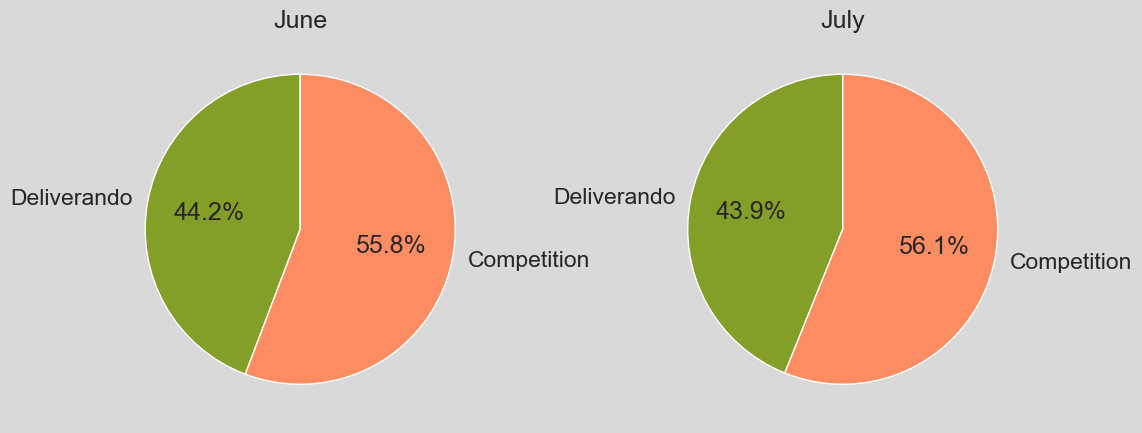

In [152]:
# Data for Deliverando and Competition restaurants in Month 1 and Month 2
deliverando_month1 = 211
deliverando_month2 = 216
competition_month1 = 266
competition_month2 = 276

# Create a list with the restaurant counts for each company
restaurants_month1 = [deliverando_month1, competition_month1]
restaurants_month2 = [deliverando_month2, competition_month2]

# Company names for labeling the pie charts
companies = ['Deliverando', 'Competition']

# Colors for Deliverando and Competition
colors = ['#849f27', '#fc8d62']

# Create a figure with 2 subplots, one for each month
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='#d9d9d9', gridspec_kw={'wspace': 0.4})

# Set font size to double
sns.set(font_scale=1.5)

# Plot the pie chart for Month 1
axs[0].pie(restaurants_month1, labels=companies, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('June')

# Plot the pie chart for Month 2
axs[1].pie(restaurants_month2, labels=companies, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('July')

# Set the aspect ratio to be equal so that the pie charts are circular
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Display the pie charts
plt.savefig('comparison_pie.png', dpi=300)
plt.show()

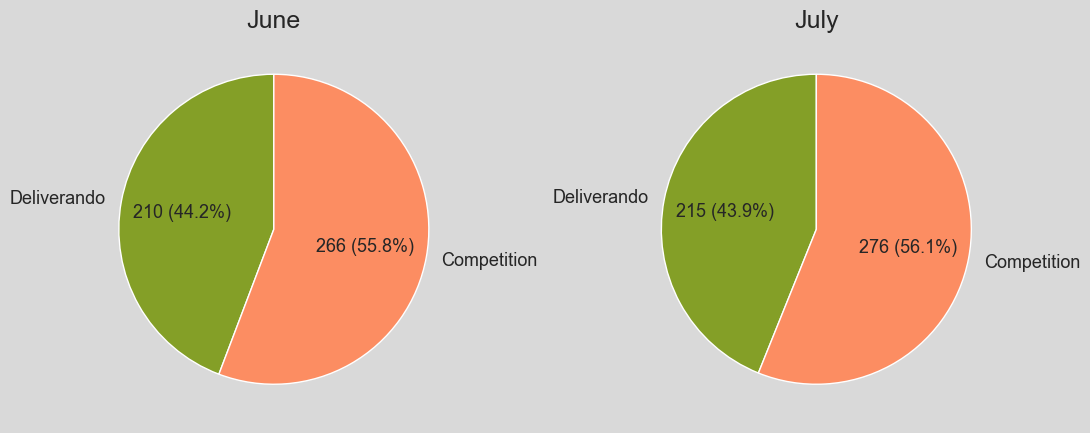

In [156]:
# Data for Deliverando and Competition restaurants in Month 1 and Month 2
deliverando_month1 = 211
deliverando_month2 = 216
competition_month1 = 266
competition_month2 = 276

# Create a list with the restaurant counts for each company
restaurants_month1 = [deliverando_month1, competition_month1]
restaurants_month2 = [deliverando_month2, competition_month2]

# Company names for labeling the pie charts
companies = ['Deliverando', 'Competition']

# Colors for Deliverando and Competition
colors = ['#849f27', '#fc8d62']

# Create a figure with 2 subplots, one for each month
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='#d9d9d9', gridspec_kw={'wspace': 0.4})

# Set font size to double
sns.set(font_scale=1.5)

# Custom function to display absolute numbers and percentages with smaller font size
def absolute_and_percentage(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.0f} ({:.1f}%)".format(absolute, pct)

# Plot the pie chart for Month 1 with smaller font size
axs[0].pie(restaurants_month1, labels=companies, autopct=lambda pct: absolute_and_percentage(pct, restaurants_month1), startangle=90, colors=colors, textprops={'fontsize': 13})
axs[0].set_title('June')

# Plot the pie chart for Month 2 with smaller font size
axs[1].pie(restaurants_month2, labels=companies, autopct=lambda pct: absolute_and_percentage(pct, restaurants_month2), startangle=90, colors=colors, textprops={'fontsize': 13})
axs[1].set_title('July')

# Set the aspect ratio to be equal so that the pie charts are circular
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Display the pie charts
plt.savefig('comparison_pie.png', dpi=300)
plt.show()

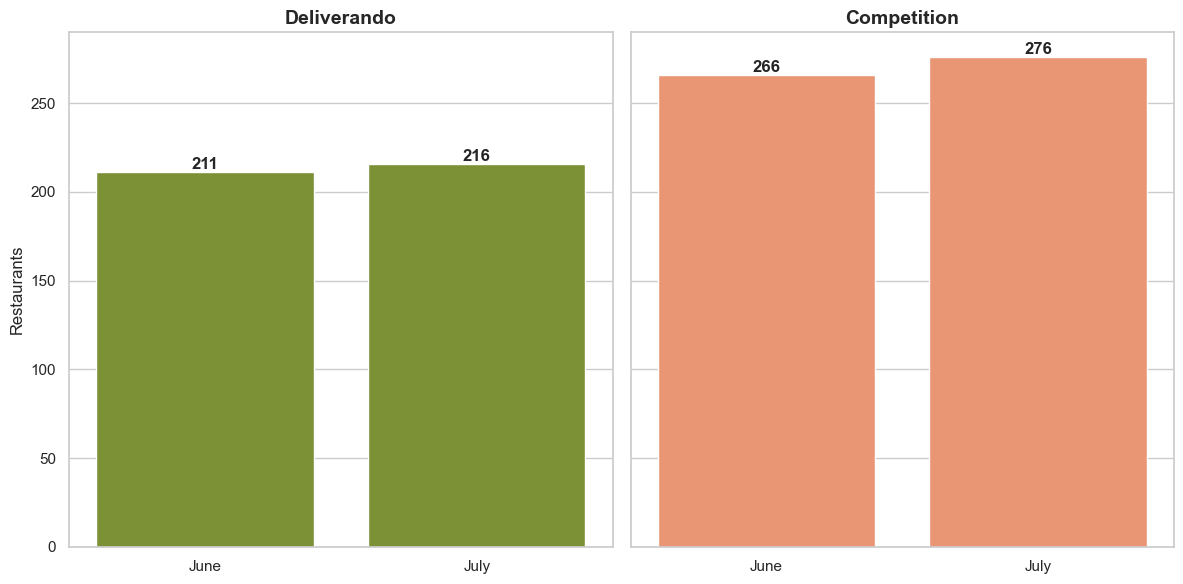

In [128]:
# Data
months = ['June', 'July']
deliverando_restaurants = [211, 216]
competition_restaurants = [266, 276]

# Create a figure with two subplots (1 row, 2 columns) sharing the y-axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Customize colors
deliverando_color = '#849f27'
competition_color = '#fc8d62'

# Bar chart for Deliverando
sns.barplot(x=months, y=deliverando_restaurants, ax=axs[0], color=deliverando_color)
axs[0].set_title('Deliverando', fontsize=14, fontweight='bold')
# axs[0].set_xlabel('Months')
axs[0].set_ylabel('Restaurants')
axs[0].set_ylim(0, 290)  # Set y-axis upper limit to 290

# Add data labels on top of the bars for Deliverando
for index, value in enumerate(deliverando_restaurants):
    axs[0].text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

# Bar chart for Competition
sns.barplot(x=months, y=competition_restaurants, ax=axs[1], color=competition_color)
axs[1].set_title('Competition', fontsize=14, fontweight='bold')
#axs[1].set_xlabel('Months')
# axs[1].set_ylabel('Restaurants') # Comment out this line to remove y-axis label for the second subplot
axs[1].set_ylim(0, 290)  # Set y-axis upper limit to 290

# Add data labels on top of the bars for Competition
for index, value in enumerate(competition_restaurants):
    axs[1].text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('comparison.png', dpi=300)
plt.show()

In [141]:
data = pd.DataFrame([[1, 1.24],[1, 1.38]])
data[0]

0    1
1    1
Name: 0, dtype: int64

In [142]:
test_statistic, pvalue = stats.ttest_ind(data[0], data[1])
print (test_statistic, pvalue)

-4.428571428571432 0.0473931200123467


### 2. How many restaurants are exclusively online with our competitors and not available on deliverando?

In [16]:
set_competition = set(df_competition_month1['name'].unique())|set(df_competition_month2['name'].unique())
set_deliverando = set(df_deliverando['name'].unique())
only_competition = sorted(set_competition - set_deliverando, key=lambda x: x.lower()) # sorts regardless upper / lowercase

only_comp_str = ', '.join(only_competition) # makes a string out of list items
print(f'There are {len(only_competition)} restaurants solely on competing platforms.\n\
These are:', only_comp_str + '.')

There are 117 restaurants solely on competing platforms.
These are: Al Forno, Alkexpress Graz, Anka Pizza & Kebap, Antalya Kebap & Pizza, Arena - Kebap, Pizza, Burger, Asia Restaurant -Cineplexx, Asia-Wok Royal, Asparagos, Babe Asia-Noodle-House, Barista's, Bauernwirt, Bellagio Uni Viertel, Bellys 2, Best Food Grill 7, BOWL - GRAZ HAUPTPLATZ, Bräukeller, Bungalow, Burger Factory, By Kebap, Cafe Bali, Cafe Pizzeria La Famiglia, Café Beirut, Campus Cafe, Ceylon Curry, China Restaurant Goldener Fisch, China Restaurant Szechuan, Chinarestaurant Shun Feng, Chop - Suey, Clocktower American Bar & Grill, Die Bausatz Lokale, Die Herzl, Dim Sum, Dolce Vita Graz, Don Camillo Murpark, Dumpling Factory, Dunkin' Donuts, Eat - Asiafood, Eiskaffee ROMA-Konditorei, eleven, Eli's, Elit Restaurant Graz, Euro kebap, Europa Kebab, Fandl Hendl, Flamingo Graz, Flann O'Brien, Ganesha Indian Restaurant, Gasthaus zur Traube, Georgische Küche - Tamada, Gourmet Express, Grill & Box, Grill Am Gries, Gössendorfer P

In [17]:
# test - intersection

# intersection = set_competition & set_deliverando
# intersection

### 3. Which restaurants have placed the most orders with our competitors (top 10)?

In [18]:
# join month 1 and 2:

df_competition = pd.merge(df_competition_month1, df_competition_month2, how='inner', on=['name', 'delivery_service'])
df_competition.head(3)

,name,month_x,delivery_service,orders_x,month_y,orders_y
0,Adelphia,1,competition,126,2,234
1,Aegaeis - Greek Grill,1,competition,9,2,13
2,Afghan Restaurant,1,competition,40,2,78


In [19]:
# drop irrelevant columns and rename orders

df_competition = df_competition.drop(['month_x', 'month_y'], axis='columns')
df_competition.rename(columns={'orders_x':'month_1', 'orders_y':'month_2'},
                      inplace=True)

df_competition['orders_total'] = df_competition['month_1'] + df_competition['month_2']
df_competition

,name,delivery_service,month_1,month_2,orders_total
0,Adelphia,competition,126,234,360
1,Aegaeis - Greek Grill,competition,9,13,22
2,Afghan Restaurant,competition,40,78,118
3,Akakiko,competition,1054,1573,2627
4,Akdag Kebap,competition,87,196,283
...,...,...,...,...,...
269,eleven,competition,5,14,19
270,my Kentt Pizza & Kebap,competition,367,1407,1774
271,taste&soul - powered by eatclever,competition,208,348,556
272,the italian,competition,250,463,713


In [20]:
# melt orders

# df_competition = pd.melt(df_competition,
#                     id_vars=['name', 'zip', 'delivery_service'], # these will be kept as separate columns
#                     value_vars=['month_1', 'month_2'], # these we are melting into one column
#                     var_name = 'month', # new name for the melted column
#                     value_name='orders') # new name for the column with melted values
# df_competition

In [21]:
# sort

df_competition = df_competition.sort_values('orders_total', ascending=False).reset_index(drop=True)
df_competition.head(10)

,name,delivery_service,month_1,month_2,orders_total
0,Chin Chin Asia Specials,competition,2443,2938,5381
1,Don Camillo,competition,2731,2068,4799
2,China Restaurant Imperium,competition,1658,2378,4036
3,dean & david,competition,1734,1863,3597
4,Momo's Restaurant,competition,1905,1244,3149
5,McDonald's®,competition,1158,1715,2873
6,Hai Asia,competition,1133,1679,2812
7,Akakiko,competition,1054,1573,2627
8,Dolce Vita Graz,competition,974,1532,2506
9,Don Daniele,competition,932,1508,2440


### *Are these restaurants also active on deliverando and if so, how did the orders on the deliverando platform compare to the performance on the competitor platform?*

In [22]:
# total orders for deliverando

df_deliverando[['month_1','month_2']] = df_deliverando[['month_1','month_2']].astype(int)
df_deliverando['sum'] = df_deliverando['month_1'] + df_deliverando['month_2']
df_deliverando['sum'] = df_deliverando['sum'].fillna(0).astype(int)
df_deliverando.head(3)

,name,kpi,delivery_service,month_1,month_2,sum
0,Adelphia,# Commissionable Orders,deliverando,78,69,147
1,Aegaeis - Greek Grill,# Commissionable Orders,deliverando,25,1,26
2,Afghan Restaurant,# Commissionable Orders,deliverando,0,0,0


In [23]:
# outer join for deliverando and competition

# df_all = pd.merge(df_deliverando, df_competition, how='outer', on=['name','zip','delivery_service', 'month_1', 'month_2'])
# df_all.rename(columns={'orders_total_x':'total_deliverando', 'orders_total_y':'total_competition'}, inplace=True)
# df_all


In [24]:
# filter for KPI == orders in deliverando

df_deliverando_orders = df_deliverando[df_deliverando['kpi']=='# Commissionable Orders']
df_deliverando_orders = df_deliverando_orders.drop('kpi', axis='columns')
df_deliverando_orders.head(3)

,name,delivery_service,month_1,month_2,sum
0,Adelphia,deliverando,78,69,147
1,Aegaeis - Greek Grill,deliverando,25,1,26
2,Afghan Restaurant,deliverando,0,0,0


In [25]:
# drop delivery_service and monthly orders from both
df_competition = df_competition.drop(['delivery_service', 'month_1', 'month_2'], axis='columns')
df_deliverando_orders = df_deliverando_orders.drop(['delivery_service', 'month_1', 'month_2'], axis='columns')

In [26]:
df_competition.head(3)

,name,orders_total
0,Chin Chin Asia Specials,5381
1,Don Camillo,4799
2,China Restaurant Imperium,4036


In [27]:
df_deliverando_orders.head(3)

,name,sum
0,Adelphia,147
1,Aegaeis - Greek Grill,26
2,Afghan Restaurant,0


In [28]:
##################### test: there are restaurants with orders from both delivery services
# set_competition = set(df_competition[df_competition['orders_total']>0]['name'].unique())
# set_deliverando = set(df_deliverando_orders[df_deliverando_orders['orders_total']>0]['name'].unique())

# intersection = set_competition & set_deliverando
# intersection

In [29]:
# left join with competition

df_all = pd.merge(left = df_competition, right = df_deliverando_orders, how='outer',\
                  on=['name'])
df_all = df_all.rename(columns={'orders_total':'orders_competition', 'sum':'orders_deliverando'})
df_all

,name,orders_competition,orders_deliverando
0,Chin Chin Asia Specials,5381.0,1580.0
1,Don Camillo,4799.0,92.0
2,China Restaurant Imperium,4036.0,1047.0
3,dean & david,3597.0,1519.0
4,Momo's Restaurant,3149.0,NaN
...,...,...,...
419,YA HABIBI - marokkanische Küche,NaN,0.0
420,Yamauchi,NaN,0.0
421,Zur Steirerstub'n,NaN,85.0
422,Zushi Market,NaN,0.0


In [30]:
df_top_10 = df_all.head(10)
df_top_10

,name,orders_competition,orders_deliverando
0,Chin Chin Asia Specials,5381.0,1580.0
1,Don Camillo,4799.0,92.0
2,China Restaurant Imperium,4036.0,1047.0
3,dean & david,3597.0,1519.0
4,Momo's Restaurant,3149.0,NaN
5,McDonald's®,2873.0,11738.0
6,Hai Asia,2812.0,NaN
7,Akakiko,2627.0,886.0
8,Dolce Vita Graz,2506.0,NaN
9,Don Daniele,2440.0,553.0


### Bonus - Locations

In [31]:
restaurant = 'Zur Steirerstub\'n'

loc = Nominatim(user_agent="mymap").geocode(
    f'{restaurant}, Graz'
)
print(loc.address, loc.latitude, loc.longitude)

Zur Steirerstub'n, 8, Lendplatz, Annenviertel, Lend, Graz, Steiermark, 8020, Österreich 47.074458 15.4307423


### 4. What conclusions regarding other KPIs can you draw from the performance of the top restaurants on deliverando?

In [32]:
# top restaurants on deliverando

deliverando_top10 = list(df_deliverando_orders.sort_values('sum', ascending=False)['name'].reset_index(drop=True).head(10))
deliverando_top10


["McDonald's®",
 'Pizzeria Ristorante Da Vinci Linz',
 'Swing Kitchen',
 'Restaurant Z10',
 'Da Piero',
 'Burger King',
 'Dolce Vita',
 'KFC',
 'Mamacita - California Burritos',
 'Beste Freunde - Burgergrill']

In [166]:
# df with all KPIs

df_deliverando_kpi = pd.read_csv('../data/SalesAnalyst_deliverando.csv', sep=';')

df_deliverando_kpi = df_deliverando_kpi[df_deliverando_kpi['zip'].isin([8010, 8020, 8036, 8041, 8042, 8043, 8045, 8051, 8052, 8053, 8054, 8055, 8063, 8077])]

df_deliverando_kpi.rename(columns={'Month 1':'month_1', 'Month 2':'month_2', 'delivery service':'delivery_service'},
                      inplace=True)

df_deliverando_kpi.drop_duplicates(inplace=True)

df_deliverando_kpi.loc[df_deliverando_kpi['name'] == 'dean & david Wels', 'name'] = 'dean & david'

df_deliverando_kpi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 1647
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1641 non-null   object 
 1   zip               1641 non-null   int64  
 2   kpi               1641 non-null   object 
 3   month_1           1641 non-null   float64
 4   month_2           1641 non-null   float64
 5   delivery_service  1641 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 89.7+ KB


In [167]:
#### apply CUMCOUNT to separate individual locations

df_deliverando_kpi['franchise'] = df_deliverando_kpi.groupby(['name','zip','kpi']).cumcount()
#df_deliverando_kpi[df_deliverando_kpi['repetitions']==2]

In [168]:
# TOP10 (keeping all KPIs)

df_deliverando_top10_kpi = df_deliverando_kpi[df_deliverando_kpi['name'].isin(deliverando_top10)].drop(columns='delivery_service')

#df_deliverando_top10_kpi[df_deliverando_kpi['repetitions']==2]


In [169]:
# melt months together
df_deliverando_top10_kpi = pd.melt(df_deliverando_top10_kpi,
                    id_vars=['name', 'zip', 'kpi', 'franchise'], # these will be kept as separate columns
                    value_vars=['month_1', 'month_2'], # these we are melting into one column
                    var_name = 'month', # new name for the melted column
                    value_name='value') # new name for the column with melted values


In [170]:
df_deliverando_top10_kpi.dtypes

name          object
zip            int64
kpi           object
franchise      int64
month         object
value        float64
dtype: object

In [171]:
# combine columns together as one franchise identificator

df_deliverando_top10_kpi['franchise'] = df_deliverando_top10_kpi['franchise'] + 1
df_deliverando_top10_kpi[['zip','franchise']] = df_deliverando_top10_kpi[['zip','franchise']].astype(str)

df_deliverando_top10_kpi['name_franchise'] = df_deliverando_top10_kpi['name'] +' '+ df_deliverando_top10_kpi['zip']\
+' No. '+ df_deliverando_top10_kpi['franchise']

df_deliverando_top10_kpi


,name,zip,kpi,franchise,month,value,name_franchise
0,Dolce Vita,8020,# Commissionable Orders,1,month_1,1178.00,Dolce Vita 8020 No. 1
1,Dolce Vita,8020,Avg Basket Size €,1,month_1,19.12,Dolce Vita 8020 No. 1
2,Dolce Vita,8020,# Negative Comments,1,month_1,0.00,Dolce Vita 8020 No. 1
3,Dolce Vita,8020,# Positive Comments,1,month_1,1.00,Dolce Vita 8020 No. 1
4,Dolce Vita,8020,% Kill Rate,1,month_1,0.06,Dolce Vita 8020 No. 1
...,...,...,...,...,...,...,...
191,Mamacita - California Burritos,8010,Avg Basket Size €,1,month_2,23.01,Mamacita - California Burritos 8010 No. 1
192,Mamacita - California Burritos,8010,# Negative Comments,1,month_2,10.00,Mamacita - California Burritos 8010 No. 1
193,Mamacita - California Burritos,8010,# Positive Comments,1,month_2,1.00,Mamacita - California Burritos 8010 No. 1
194,Mamacita - California Burritos,8010,% Kill Rate,1,month_2,103.00,Mamacita - California Burritos 8010 No. 1


In [173]:
# rename restaurants back to nice names where appropriate for presentation

df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Beste Freunde - Burgergrill 8020 No. 1', 'name_franchise'] = 'Beste Freunde - Burgergrill'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Da Piero 8020 No. 1', 'name_franchise'] = 'Da Piero'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Dolce Vita 8020 No. 1', 'name_franchise'] = 'Dolce Vita'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'KFC 8020 No. 1', 'name_franchise'] = 'KFC'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Mamacita - California Burritos 8010 No. 1', 'name_franchise'] = 'Mamacita - California Burritos'
# assuming Pizzeria Ristorante Da Vinci is located in Granz instead of Linz:
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Pizzeria Ristorante Da Vinci Linz 8010 No. 1', 'name_franchise'] = 'Pizzeria Ristorante Da Vinci'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Restaurant Z10 8010 No. 1', 'name_franchise'] = 'Restaurant Z10'
df_deliverando_top10_kpi.loc[df_deliverando_top10_kpi['name_franchise'] == 'Swing Kitchen 8010 No. 1', 'name_franchise'] = 'Swing Kitchen'


In [174]:
df_deliverando_top10_kpi.to_csv('../data/deliverando_top10_kpi.csv')

<Axes: xlabel='value', ylabel='Count'>

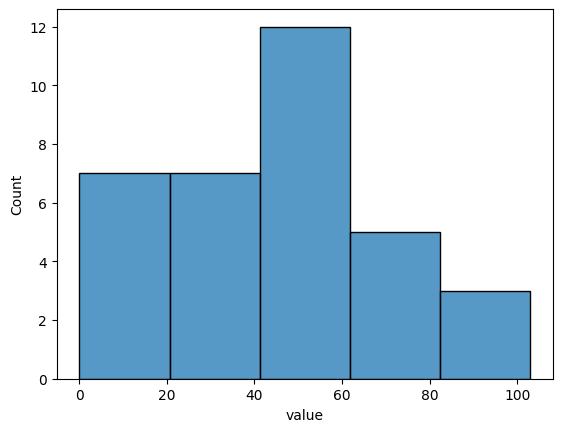

In [119]:
sns.histplot(data=df_deliverando_top10_kpi[df_deliverando_top10_kpi['kpi']=='% Kill Rate'],
             x='value',
             bins=5)